# Laboratorio 2

Estudiante 1: Juan Diego Niebles Navas - 202221193 \
Estudiante 2: Esteban Benavides Velandia - 202220429 \
Estudiante 3: Miguel Santiago Castillo Hernandez- 201633992

*Ey buenas a todos, guapisimos aquí el grupo 13 en un gameplay de planeta BI. El día de hoy vamos a resolver un problema agrupación de café (ñum ñum)...*



# 1. Entendimiento de los datos (Juan Diego Niebles)

Antes de empezar, es importante tener claro el objetivo del laboratorio, el cual es buscar grupos de café que tengan aspectos en común como heterogeneidad en tamaño, forma y estructura pues esto puede afectar tanto los procesos de tostión como la percepción de calidad del consumidor final. Así, en esta sección se va a escribir las características más relevantes de los datos y todo el perfilamiento de datos, incluir el análisis de calidad de datos y hacer una preselección de las variables más importantes para la etapa de modelado y poder cumplir de la mejor manera el objetivo.


In [44]:
# Instalación de paquetes necesarios (descomentar de ser necesario)

# !pip install numpy -q
# !pip install pandas -q
# !pip install matplotlib -q
# !pip install seaborn -q
# !pip install scikit-learn -q
# !pip install joblib -q

# imports

import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler


Inicialmente se va a realizar la carga de datos

In [45]:

# Cargar el dataset
df = pd.read_csv('Datos\Datos_SenecaféAlpes.csv', sep=',', encoding='utf-8')

# Visualizar las primeras filas
print("Primeras filas del dataset:")
display(df.head())

Primeras filas del dataset:


,ID,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,RelacionAspecto,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,DefectoVisible,MétodoSecado
0,G006149,50836,923618.0,358.515147,181.388899,alargado,NaN,NaN,254.413847,0.804762,0.983840,0.748853,0.709632,0.007052,0.001103,0.503578,0.995321,Normal,Lavado
1,G007234,62764,1003767.0,409.207082,198.330199,Alargado,NaN,64158.0,282.689948,0.703995,0.978272,0.782807,0.690824,0.006520,0.000916,0.477237,0.984666,NaN,Natural
2,G007054,59965,994266.0,389.088529,197.967275,Alargado,0.860886,60910.0,276.314692,0.661581,0.984485,0.762259,0.710159,0.006489,0.001018,0.504326,0.991211,Normal,Natural
3,G006619,55035,917.6,379.346822,185.390577,Alargado,0.872446,55591.0,NaN,0.799695,0.989998,0.821376,0.697811,0.006893,0.001008,0.486941,0.996380,Normal,Lavado
4,G013353,39324,737773.0,262.520242,191.176858,Alargado,0.685326,39758.0,223.760747,0.775392,0.989084,0.907867,0.852356,0.006676,0.002174,0.726511,0.997630,Normal,Lavado


Se puede considerar la eliminación de la columna ID ya que esta no aporta información sobre la forma de las semillas, es un identificador.

Ahora se va a revisar el tamaño del dataset para entender mejor con qué se está trabajando.

In [46]:
# Revisar dimensiones
print("Dimensiones del dataset (filas, columnas):", df.shape)

Dimensiones del dataset (filas, columnas): (14291, 19)


Se puede afirmar que hay 14291 filas que corresponden a 19 tipos de datos diferentes, que según el diccionario son:

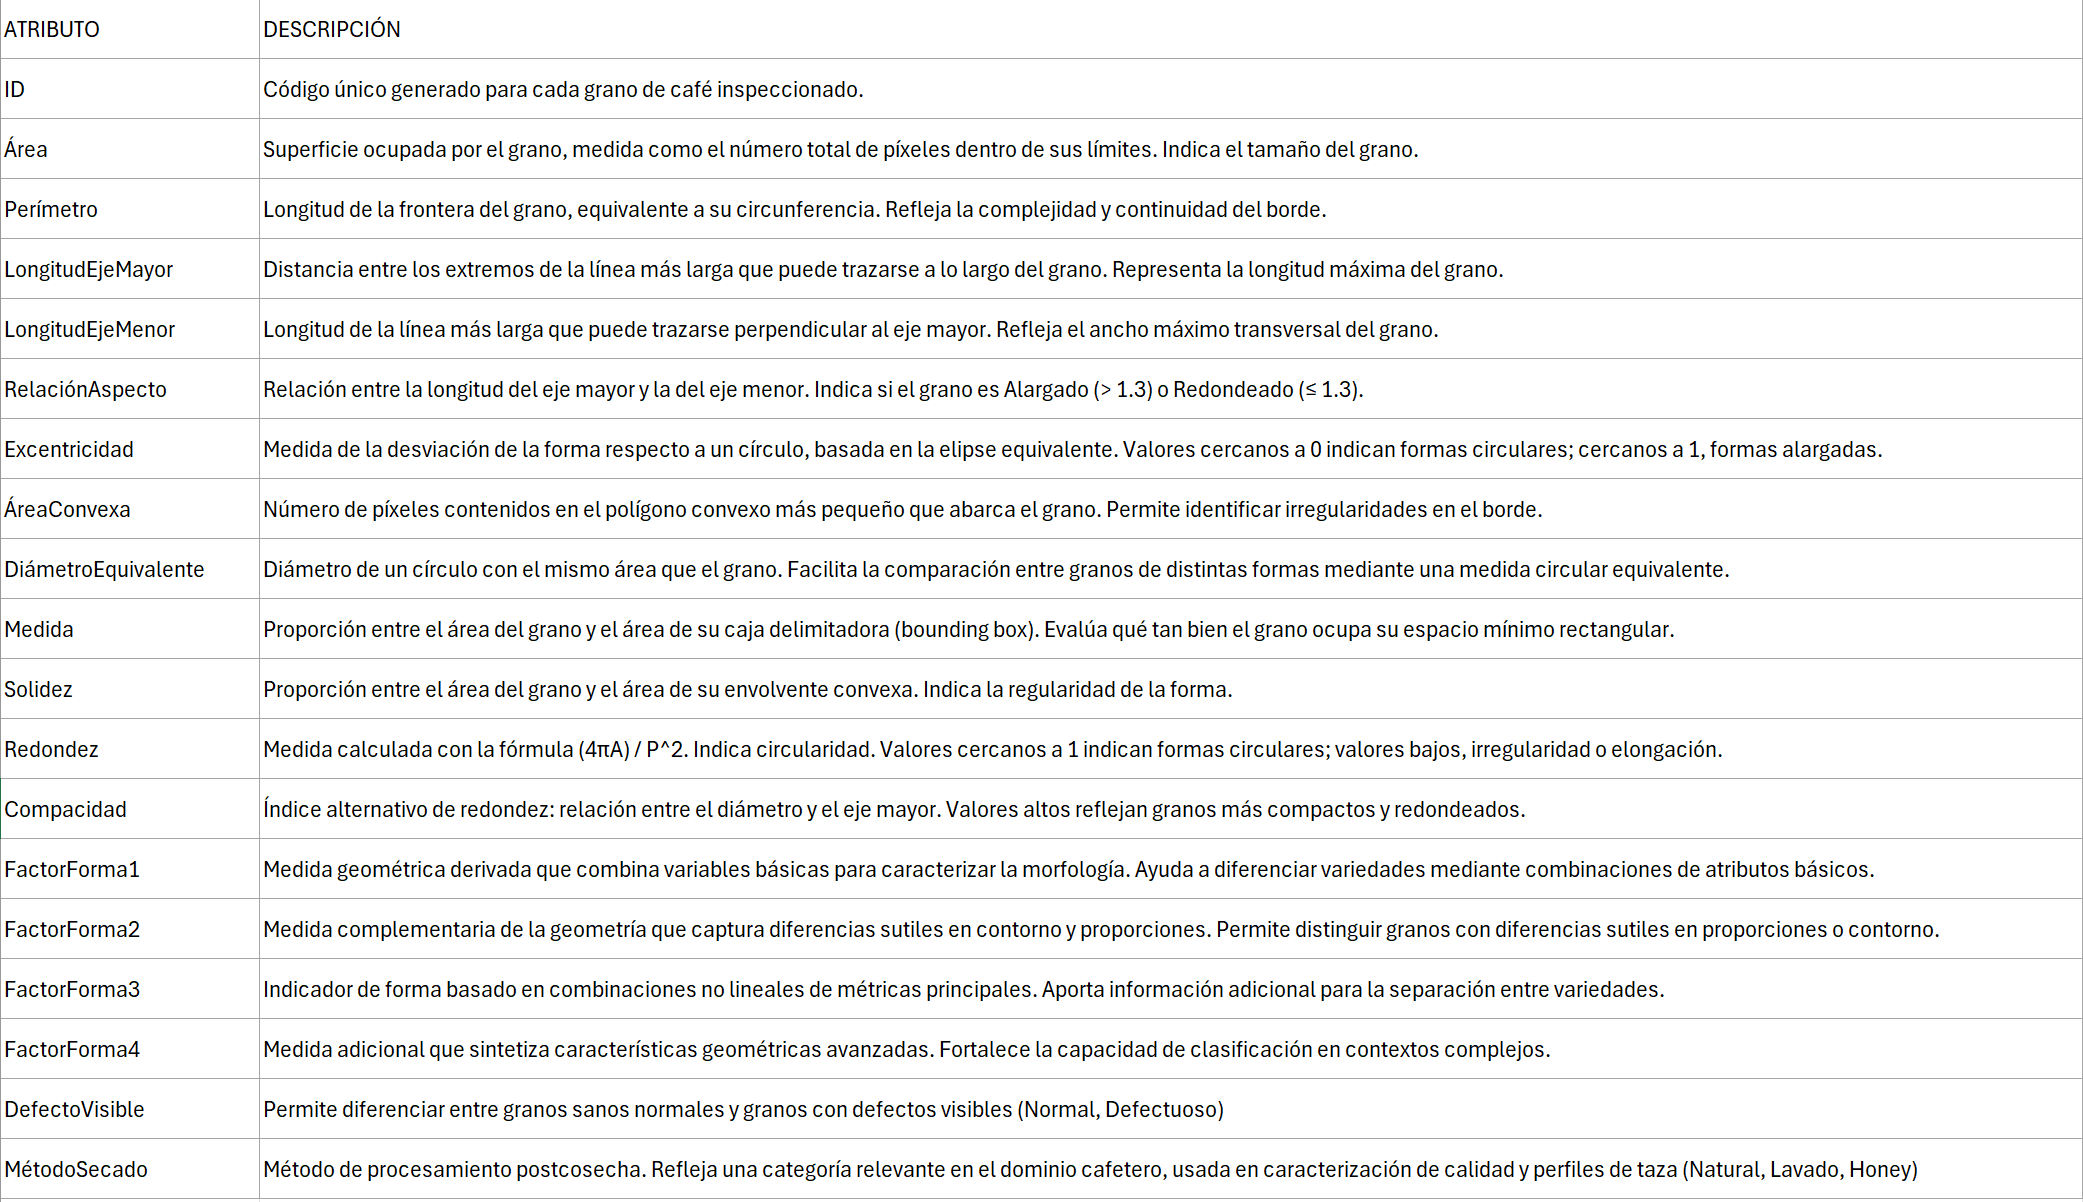

A continuación se confirman los tipos de datos.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14291 entries, 0 to 14290
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14291 non-null  object 
 1   Area                 14291 non-null  int64  
 2   Perimetro            13054 non-null  float64
 3   LongitudEjeMayor     13890 non-null  float64
 4   LongitudEjeMenor     14291 non-null  float64
 5   RelacionAspecto      13825 non-null  object 
 6   Excentricidad        13687 non-null  float64
 7   AreaConvexa          12868 non-null  float64
 8   DiametroEquivalente  12368 non-null  float64
 9   Medida               14291 non-null  float64
 10  Solidez              11985 non-null  float64
 11  Redondez             12228 non-null  float64
 12  Compacidad           13641 non-null  float64
 13  FactorForma1         13172 non-null  float64
 14  FactorForma2         13185 non-null  float64
 15  FactorForma3         13813 non-null 

Relación aspecto, DefectoVisible y MétodoSecado son un strings por lo que aparecen de tipo object. Los demás son números. 

En cuanto a las estadisticas de las variables númericas se tiene que:

In [48]:
df.describe()

,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4
count,14291.000000,1.305400e+04,13890.000000,14291.000000,13687.000000,12868.000000,12368.000000,14291.000000,11985.000000,12228.000000,13641.000000,13172.000000,13185.000000,13813.000000,13132.000000
mean,53055.408999,7.729870e+05,319.985592,202.178613,0.749977,53575.397809,253.001741,0.749844,0.986774,0.873080,0.799242,0.006560,0.001712,0.643183,0.994292
std,29396.080372,3.266493e+05,86.378452,45.494541,0.099438,29566.387814,60.542330,0.050774,0.025947,0.063237,0.067643,0.001164,0.000601,0.100857,0.039081
min,-62716.000000,-1.012143e+06,-421.444657,-200.838672,-0.835004,-78423.000000,-448.402605,-0.798706,-0.989042,-0.896861,-0.843901,-0.007982,-0.002673,-0.683269,-0.998527
25%,36338.000000,6.768608e+05,253.319858,175.881052,0.715144,36720.000000,215.302463,0.718767,0.985597,0.832824,0.762127,0.005903,0.001151,0.581047,0.993663
50%,44660.000000,7.720345e+05,296.682345,192.437870,0.764392,45107.500000,238.579492,0.760232,0.988279,0.883353,0.800994,0.006645,0.001691,0.641648,0.996377
75%,61311.000000,9.554098e+05,376.548109,216.847844,0.810441,62109.250000,279.672481,0.786942,0.989991,0.916803,0.834405,0.007273,0.002169,0.696366,0.997889
max,254616.000000,1.921685e+06,738.860154,460.198497,0.911423,251082.000000,569.374358,0.866195,0.994378,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


Se puede ver desviaciones estandares muy altas para el área, el perimetro, las longitudes y el diametro. Esto puede ser un primer indicio de datos atipicos, por lo que se van a revisar los graficos de boxplot para ver mejor la distribución de los datos.

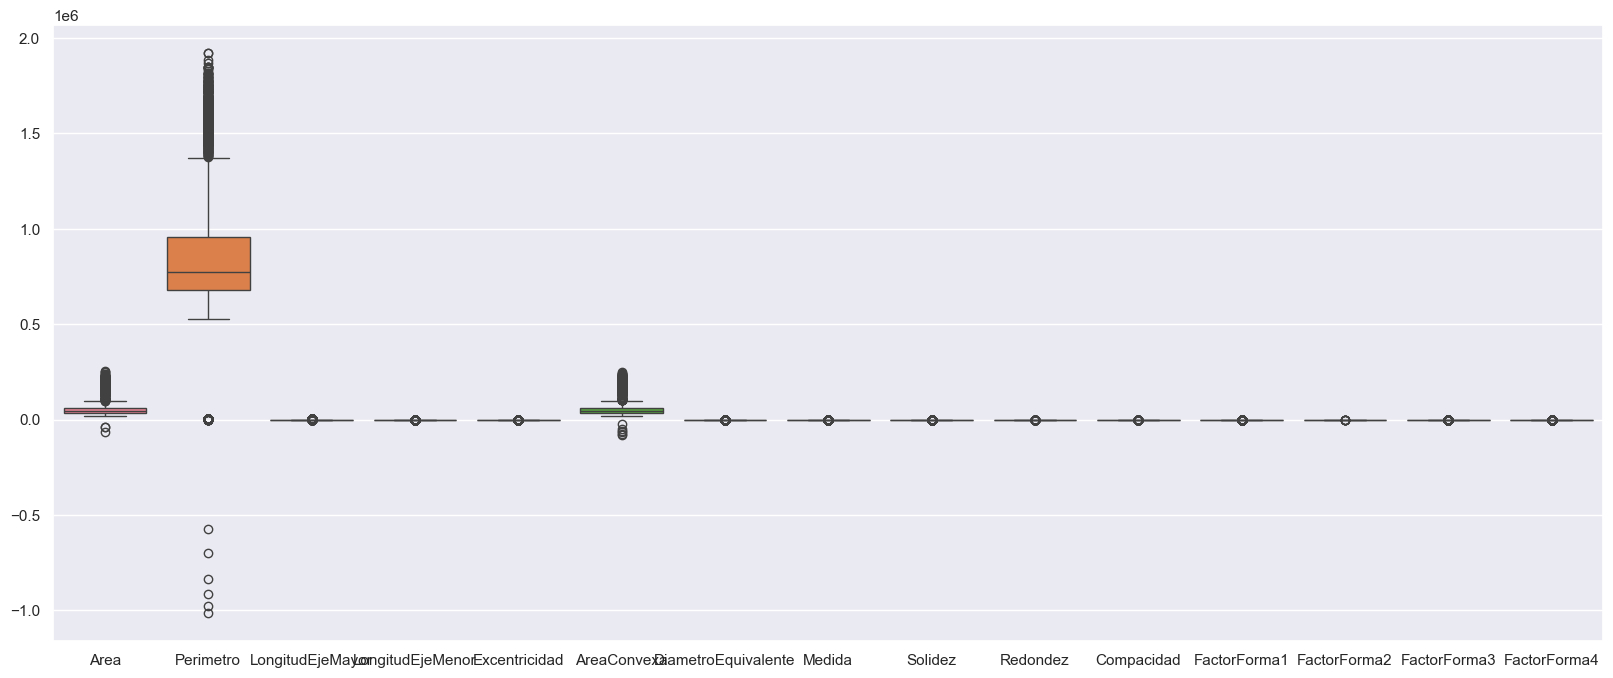

In [49]:


fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df, orient="v")

Al estar en escalas diferentes se pierde información para varias graficas, pero se puede apreciar distribuciones raras para el area y el perimetro. A continuación se grafican de forma individual.

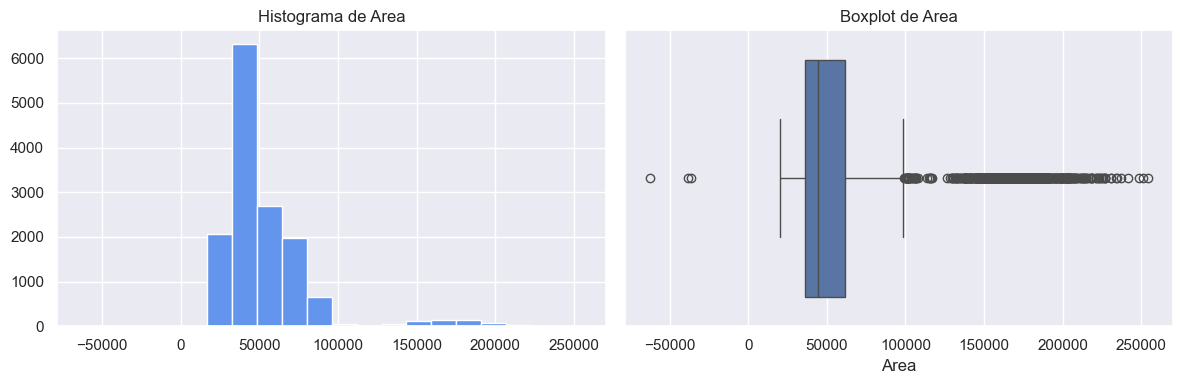

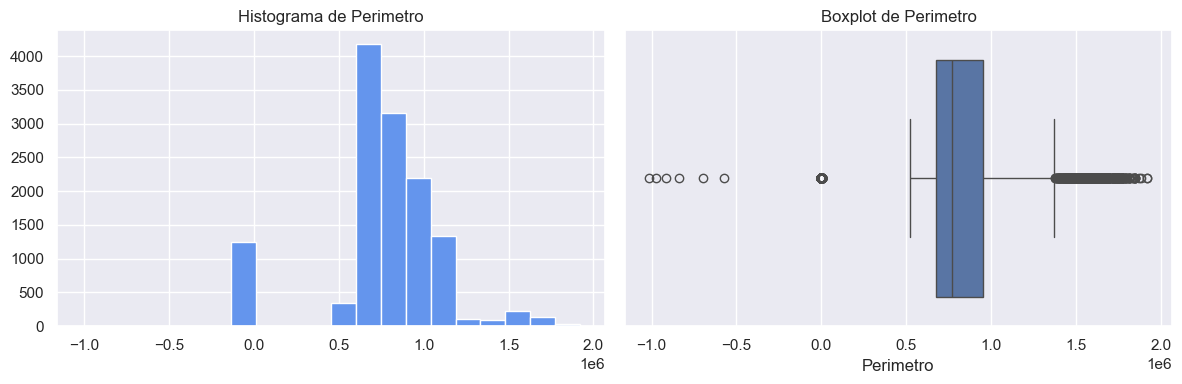

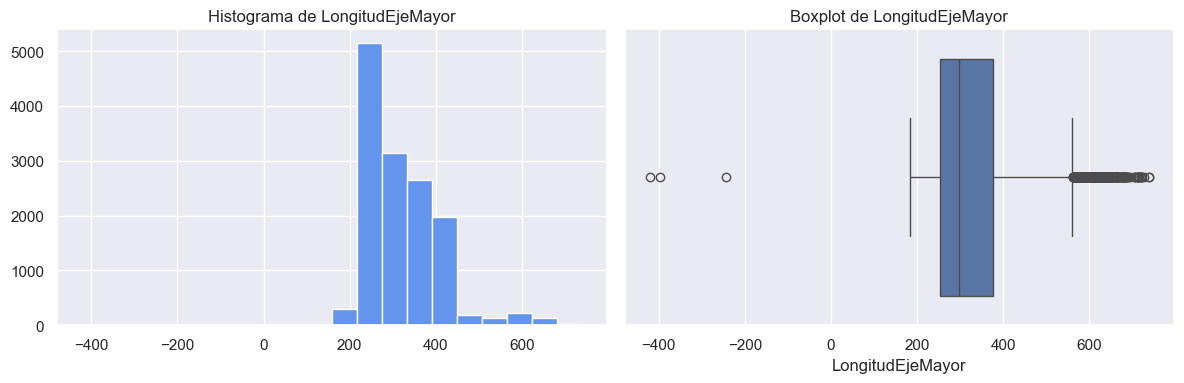

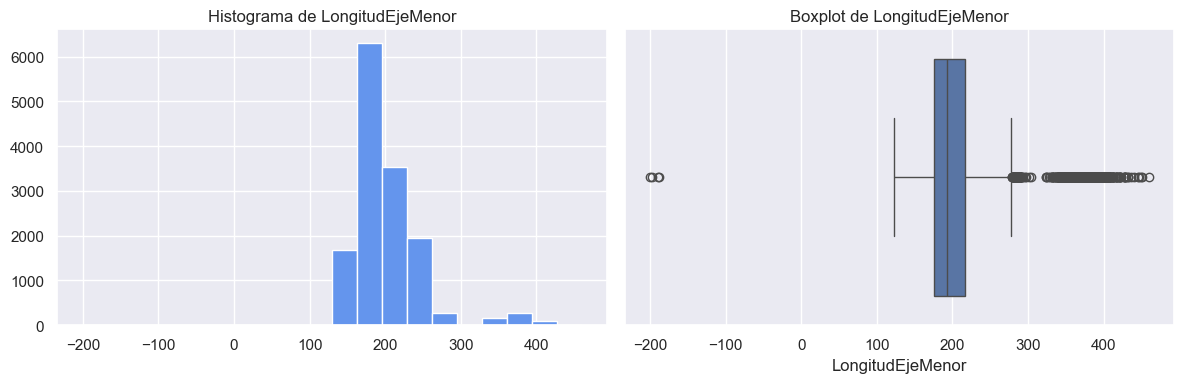

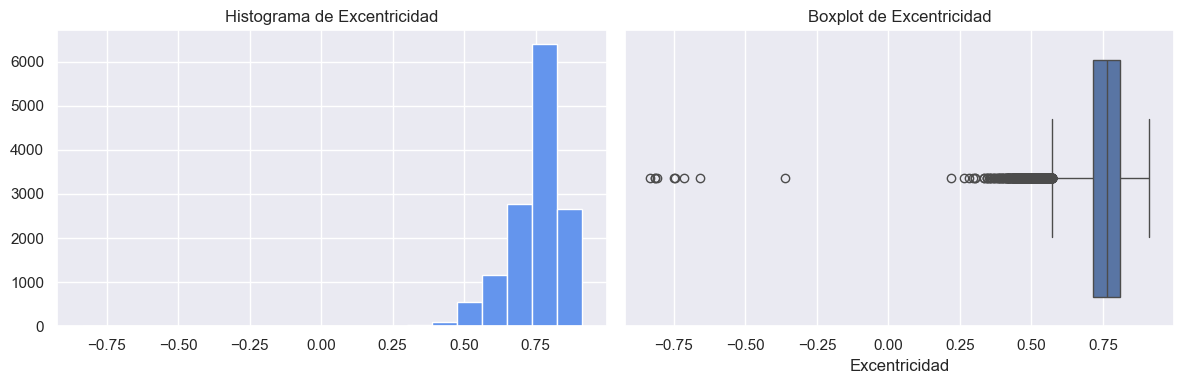

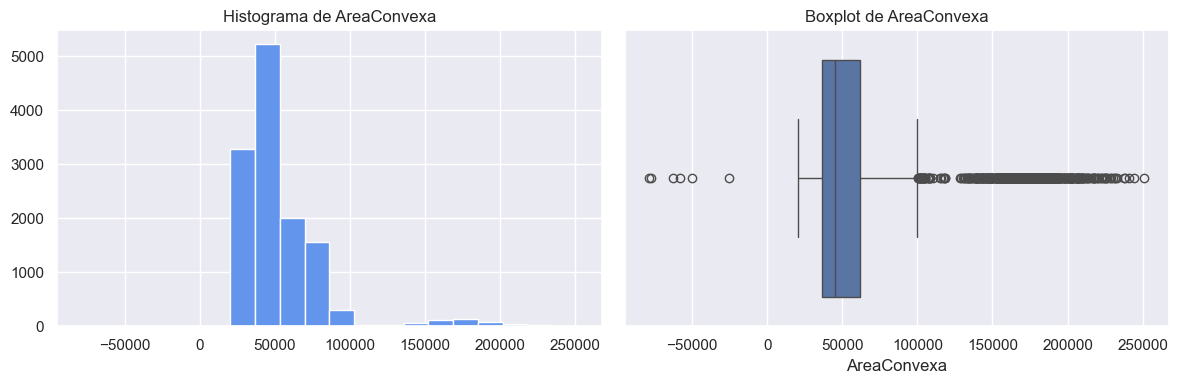

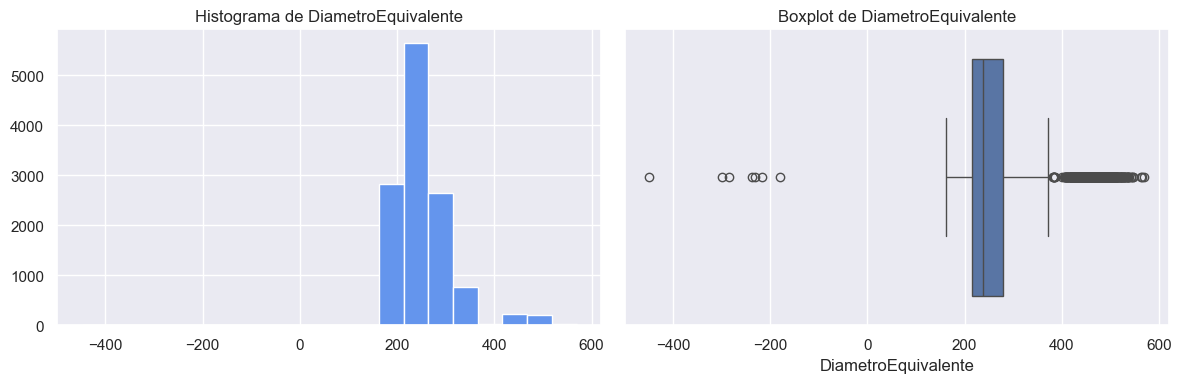

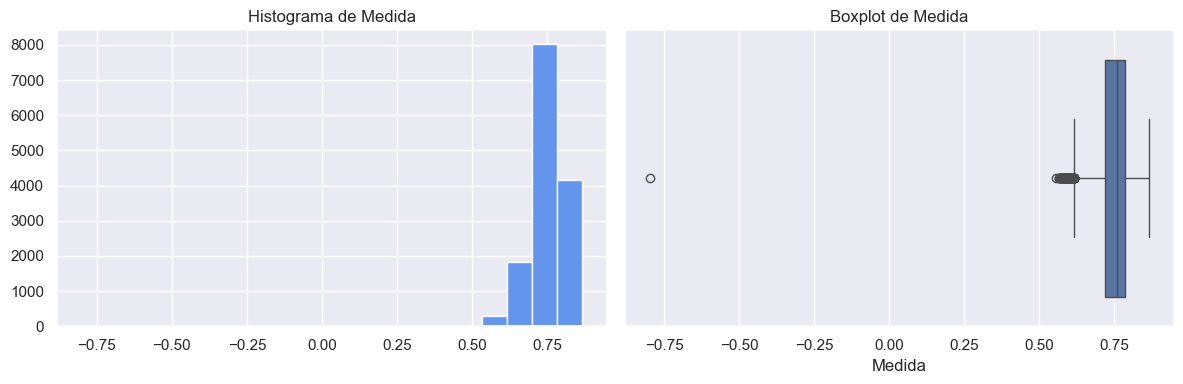

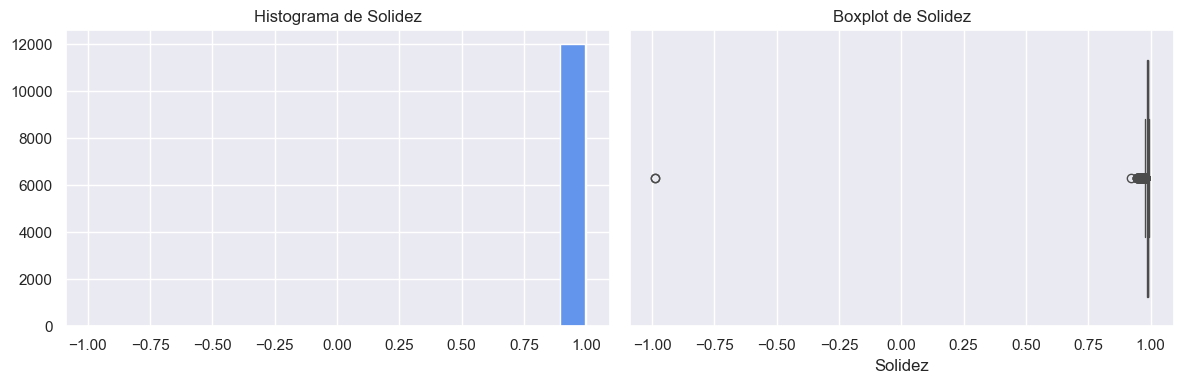

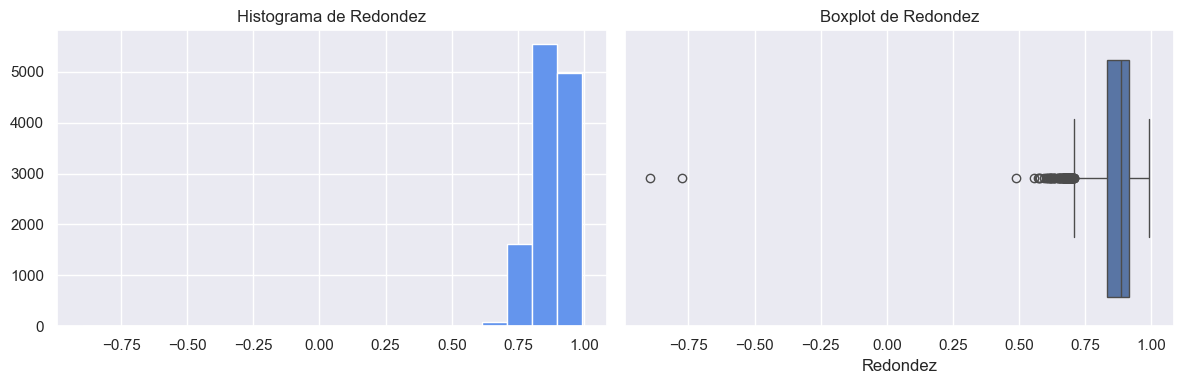

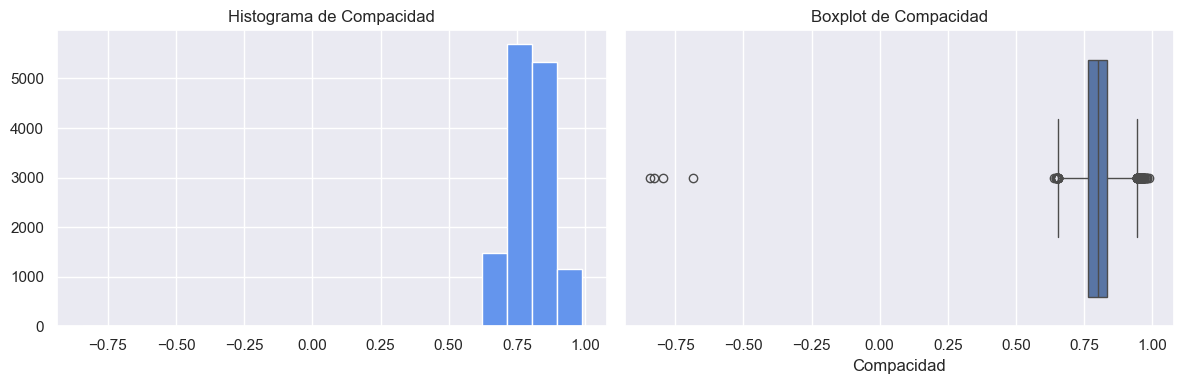

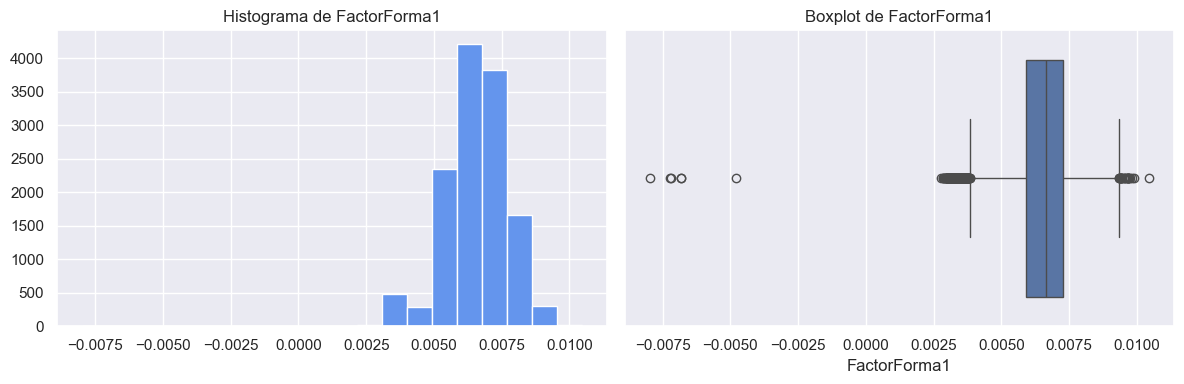

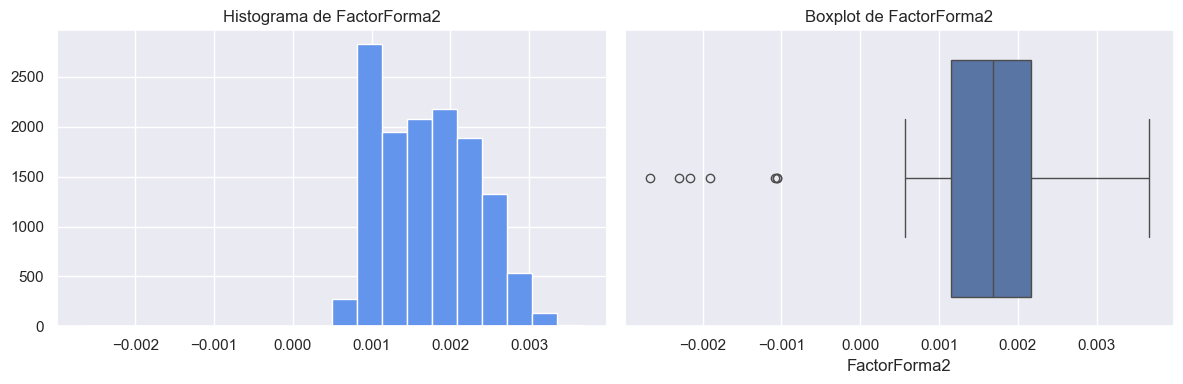

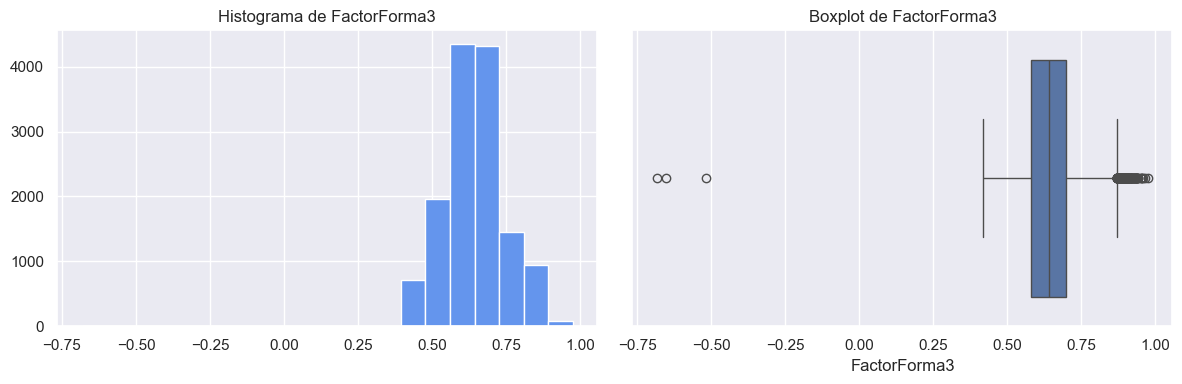

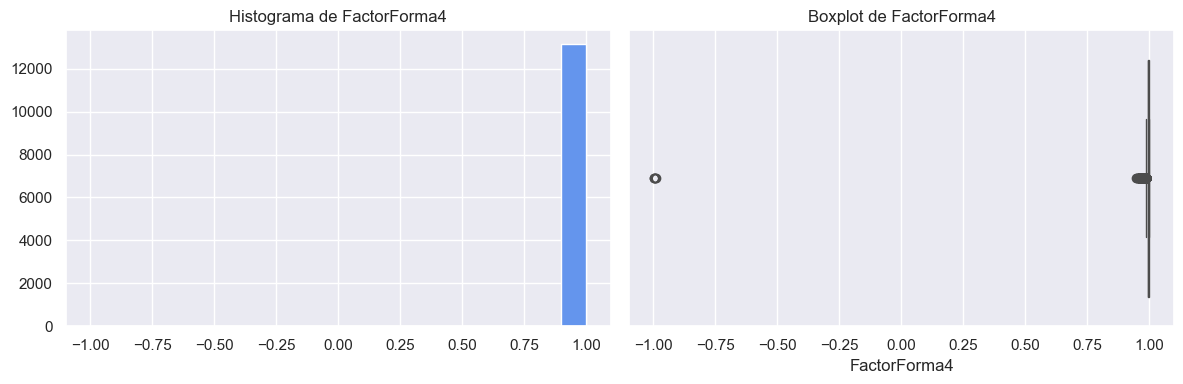

In [50]:

# Histogramas y boxplots para variables numéricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    df[col].dropna().hist(ax=axes[0], bins=20, color='cornflowerblue')
    axes[0].set_title(f"Histograma de {col}")
    sns.boxplot(data=df, x=col, ax=axes[1])
    axes[1].set_title(f"Boxplot de {col}")
    plt.tight_layout()
    plt.show()

Se puede ver que la mayoria de las categorias tienen valores negativos, se va a tener que limpiar eso. También se puede evidenciar la existencia de valores fuera de los rangos normales. Por ejemplo, areas de más de 200 mil pixeles o perimetros mayores a 10 mil pixeles. Se puede pensar inicialmente que es mejor desechar ambas categorias del dataset ya que pueden distorcionar los resultados y no representan el tamaño real del objeto pues se ven afectados por la cantidad de zoom.

Ahora se van a ver las variables categoricas y su distribución.


In [51]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove("ID") 
if cat_cols:
    for col in cat_cols:
        print(f"\n---- value_counts() para '{col}' (top 20) ----")
        print(df[col].value_counts(dropna=False).head(20))


---- value_counts() para 'RelacionAspecto' (top 20) ----
Alargado      12047
Redondeado     1739
NaN             466
alargado         29
redondeado       10
Name: RelacionAspecto, dtype: int64

---- value_counts() para 'DefectoVisible' (top 20) ----
Normal    9096
NaN       2935
normal    2260
Name: DefectoVisible, dtype: int64

---- value_counts() para 'MétodoSecado' (top 20) ----
Lavado     6260
Natural    4639
lavado     1552
natural    1176
NaN         587
Honey        64
honey        13
Name: MétodoSecado, dtype: int64


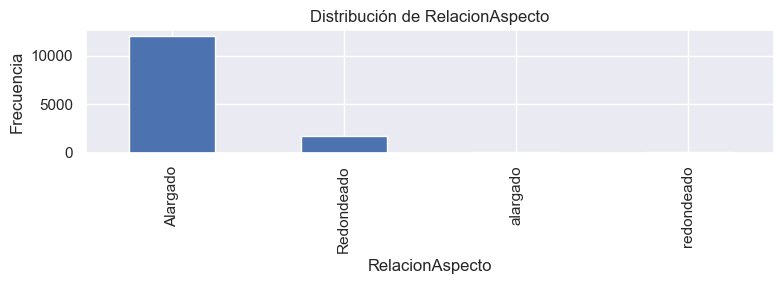

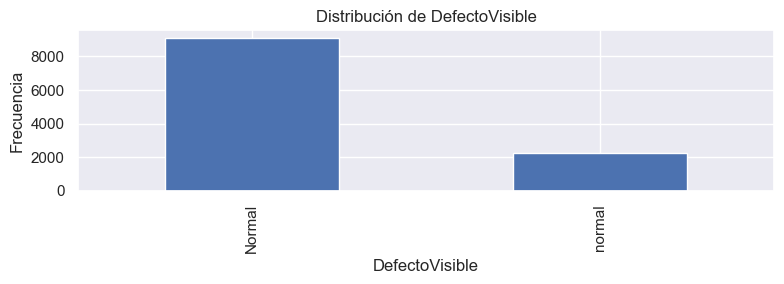

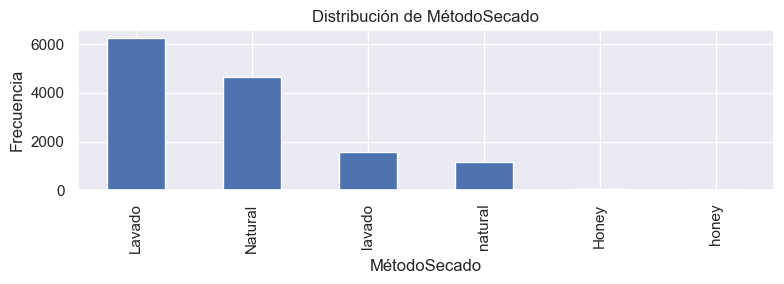

In [52]:
if cat_cols:
    for col in cat_cols:
        if df[col].nunique() <= 20:
            plt.figure(figsize=(8,3))
            df[col].value_counts().plot(kind='bar')
            plt.title(f"Distribución de {col}")
            plt.xlabel(col)
            plt.ylabel('Frecuencia')
            plt.tight_layout()
            plt.show()

Se ve que defecto visible no aporta información ya que tiene dos categorías: normal y Normal, se puede eliminar. Las demás categorías sí muestran información acerca de a qué clase podrían pertenecer los granos aunque cuentan con columnas que estan repetidas por lo que hay que arreglar eso antes de hacer cuaquier transformación. 

Ahora se va a ver la correlación de las variables entre si, para ver si alguna sobra.

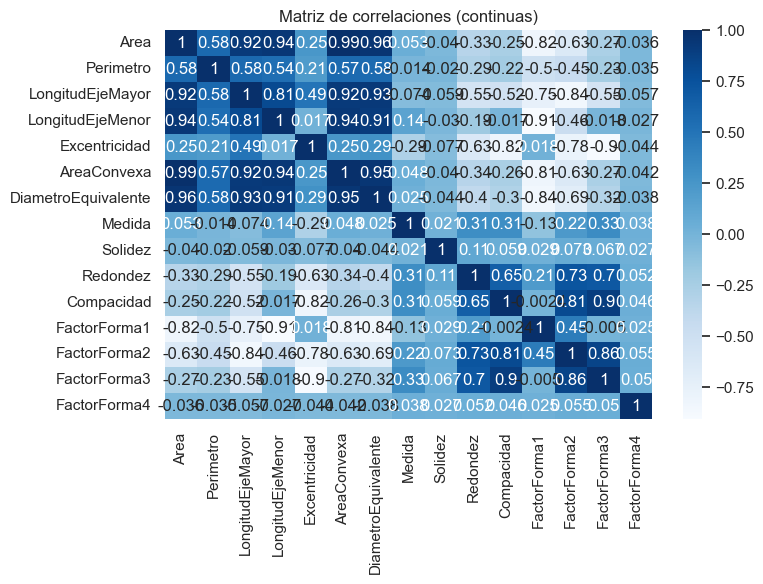

In [53]:
def es_binaria(serie):
    vals = serie.dropna().unique()
    return len(vals) <= 2

cont_cols = [c for c in num_cols if not es_binaria(df[c])]
bin_cols  = [c for c in num_cols if es_binaria(df[c])]

if len(cont_cols) > 1:
    corr = df[cont_cols].corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, cmap='Blues')
    plt.title("Matriz de correlaciones (continuas)")
    plt.tight_layout()
    plt.show()

Se van a dejar las variables que tengan menos de 0.85 de correlación. 

Se puede ver una gran correlación entre DiametroEquivalente, AreaConvexa, LongitudEjeMenor, LongitudEjeMayor y Area. Se va a utilizar la variable DiametroEquivalente para representarlas.

También se puede simplificar la Compacidad y FactorForma2 que pueden ser representadas por FactorForma3.

Ahora, se va a ver la unicidad de los datos.


In [54]:
print(df.duplicated(keep = False).sum())

922


hay 922 filas repetidas.

Finalmente se van a revisar la cantidad de nulos que hay por categoría.

In [55]:
print("Valores nulos por columna:\n", df.isnull().sum())

Valores nulos por columna:
 ID                        0
Area                      0
Perimetro              1237
LongitudEjeMayor        401
LongitudEjeMenor          0
RelacionAspecto         466
Excentricidad           604
AreaConvexa            1423
DiametroEquivalente    1923
Medida                    0
Solidez                2306
Redondez               2063
Compacidad              650
FactorForma1           1119
FactorForma2           1106
FactorForma3            478
FactorForma4           1159
DefectoVisible         2935
MétodoSecado            587
dtype: int64


Con respecto al tamaño del dataframe se puede ver que la cantidad de los nulos de las columnas que se van a utilizar no es tan significativa.

# Preparación de los Datos

Inicialmente se va a crear un nuevo dataset con las columnas a utilizar.

In [56]:
columnas_a_mantener = ["DiametroEquivalente", 
                    "Excentricidad", 
                    "Medida", 
                    "RelacionAspecto",         
                    "FactorForma3",
                    "Medida",
                    "Solidez",     
                    "Redondez",       
                    "Compacidad",     
                    "FactorForma1",   
                    "FactorForma2",   
                    "FactorForma3",   
                    "FactorForma4",
                    "MétodoSecado",]

columnas_a_usar = [c for c in columnas_a_mantener if c in df.columns]

df_og = df[columnas_a_usar].copy()
print(df_og.head())


   DiametroEquivalente  Excentricidad    Medida RelacionAspecto  FactorForma3  \
0           254.413847            NaN  0.804762        alargado      0.503578   
1           282.689948            NaN  0.703995        Alargado      0.477237   
2           276.314692       0.860886  0.661581        Alargado      0.504326   
3                  NaN       0.872446  0.799695        Alargado      0.486941   
4           223.760747       0.685326  0.775392        Alargado      0.726511   

     Medida   Solidez  Redondez  Compacidad  FactorForma1  FactorForma2  \
0  0.804762  0.983840  0.748853    0.709632      0.007052      0.001103   
1  0.703995  0.978272  0.782807    0.690824      0.006520      0.000916   
2  0.661581  0.984485  0.762259    0.710159      0.006489      0.001018   
3  0.799695  0.989998  0.821376    0.697811      0.006893      0.001008   
4  0.775392  0.989084  0.907867    0.852356      0.006676      0.002174   

   FactorForma3  FactorForma4 MétodoSecado  
0      0.503578  

Se borran las filas duplicadas ya que no aportan información

In [57]:

df = df_og.copy().drop_duplicates()
print(f"Filas duplicadas: {df.duplicated().sum()}")

Filas duplicadas: 0


Teniendo en cuenta que si hay valores nulos, el modelo puede recibir información incompleta o errónea, lo que introduce ruido y afecta la calidad de las predicciones, se tomó la decisión de borrar los valores nulos.

In [58]:
print(df.shape)
df = df.dropna()
df.shape

(13820, 14)


(5537, 14)

Ahora se revisa la consistencia y validez de los datos, enfocandose principalmente en las columnas categoricas

In [59]:
print(df.columns)
# RelacionAspecto
df['RelacionAspecto'] = (
    df['RelacionAspecto']
    .str.strip()        # quita espacios extra
    .str.lower()        # pasa todo a minúsculas
)

# MétodoSecado
df['MétodoSecado'] = (
    df['MétodoSecado']
    .str.strip()
    .str.lower()
)

df['RelacionAspecto'] = df['RelacionAspecto'].str.capitalize()
df['MétodoSecado'] = df['MétodoSecado'].str.capitalize()

print(df['RelacionAspecto'].unique())
print(df['MétodoSecado'].unique())

Index(['DiametroEquivalente', 'Excentricidad', 'Medida', 'RelacionAspecto',
       'FactorForma3', 'Medida', 'Solidez', 'Redondez', 'Compacidad',
       'FactorForma1', 'FactorForma2', 'FactorForma3', 'FactorForma4',
       'MétodoSecado'],
      dtype='object')
['Alargado' 'Redondeado']
['Natural' 'Lavado' 'Honey']


One hot encoding para las variables categoricas

In [60]:
import pandas as pd

# Aseguramos que estén en string
df['RelacionAspecto'] = df['RelacionAspecto'].astype(str)
df['MétodoSecado'] = df['MétodoSecado'].astype(str)

# One Hot Encoding
df = pd.get_dummies(
    df,
    columns=['RelacionAspecto', 'MétodoSecado'],
    prefix=['Aspecto', 'Secado'], dtype=np.int8
)

# Revisar nuevas columnas creadas
print(df.head())
print("Columnas nuevas:", [c for c in df.columns if "Aspecto" in c or "Secado" in c])


    DiametroEquivalente  Excentricidad    Medida  FactorForma3    Medida  \
2            276.314692       0.860886  0.661581      0.504326  0.661581   
4            223.760747       0.685326  0.775392      0.726511  0.775392   
7            341.138341       0.828912  0.809604      0.554696  0.809604   
10           225.529096       0.528489  0.772032      0.847583  0.772032   
11           223.954130       0.702894  0.725291      0.709299  0.725291   

     Solidez  Redondez  Compacidad  FactorForma1  FactorForma2  FactorForma3  \
2   0.984485  0.762259    0.710159      0.006489      0.001018      0.504326   
4   0.989084  0.907867    0.852356      0.006676      0.002174      0.726511   
7   0.992109  0.852938    0.744779      0.005011      0.000951      0.554696   
10  0.989155  0.939268    0.920643      0.006132      0.002717      0.847583   
11  0.988854  0.887964    0.842199      0.006751      0.002095      0.709299   

    FactorForma4  Aspecto_Alargado  Aspecto_Redondeado  Secado

Se estandariza los valores numéricos para evitar que las diferentes unidades afecten a la selección de los grupos.

In [61]:

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

cont_cols = num_cols

scaler_minmax = MinMaxScaler()
scaler_std = StandardScaler()
df_std = df.copy()
if cont_cols:
    df_std[cont_cols] = scaler_std.fit_transform(df_std[cont_cols])
print("\nVariables numéricas estandarizadas (StandardScaler):")
print(df_std[cont_cols].head())



Variables numéricas estandarizadas (StandardScaler):
    DiametroEquivalente  Excentricidad    Medida    Medida  FactorForma3  \
2              0.396394       1.082577 -1.670227 -1.670227     -1.387708   
4             -0.497261      -0.613355  0.478926  0.478926      0.819649   
7              1.498689       0.773704  1.124960  1.124960     -0.887292   
10            -0.467191      -2.128414  0.415471  0.415471      2.022473   
11            -0.493972      -0.443646 -0.467154 -0.467154      0.648651   

    FactorForma3    Medida    Medida   Solidez  Redondez  ...  FactorForma1  \
2      -1.387708 -1.670227 -1.670227 -0.573611 -1.726719  ...     -0.052562   
4       0.819649  0.478926  0.478926  0.412433  0.538635  ...      0.108953   
7      -0.887292  1.124960  1.124960  1.061022 -0.315934  ...     -1.326916   
10      2.022473  0.415471  0.415471  0.427593  1.027170  ...     -0.360001   
11      0.648651 -0.467154 -0.467154  0.363191  0.228993  ...      0.173374   

    FactorForm

# 2. Algoritmo KMeans - (Juan Diego Niebles)

C:\Users\esteb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


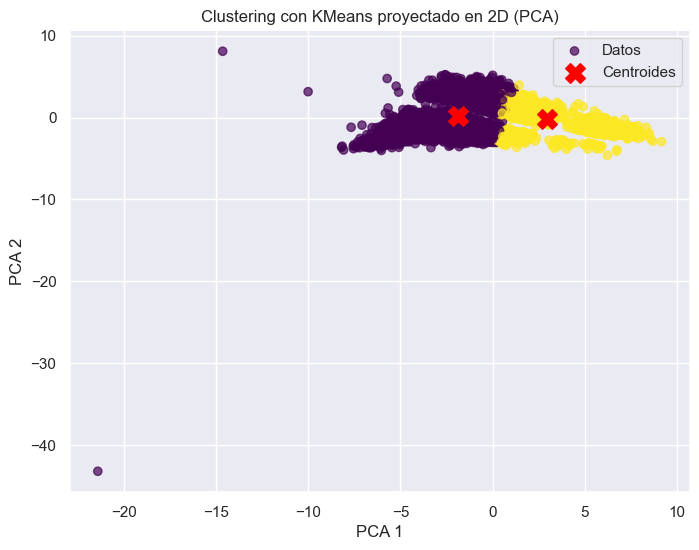

In [62]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Tomamos solo columnas numéricas
num_cols = df_std.select_dtypes(include=[np.number]).columns.tolist()
df_tracks_prep = df_std[num_cols].copy()

# Aplicamos KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(df_tracks_prep)

# Reducimos dimensiones a 2D con PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(df_tracks_prep)

# Graficamos los clusters
plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=clusters, cmap="viridis", alpha=0.7, label="Datos")

# Graficamos los centroides proyectados en PCA
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], c="red", s=200, marker="X", label="Centroides")

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clustering con KMeans proyectado en 2D (PCA)")
plt.legend()
plt.show()


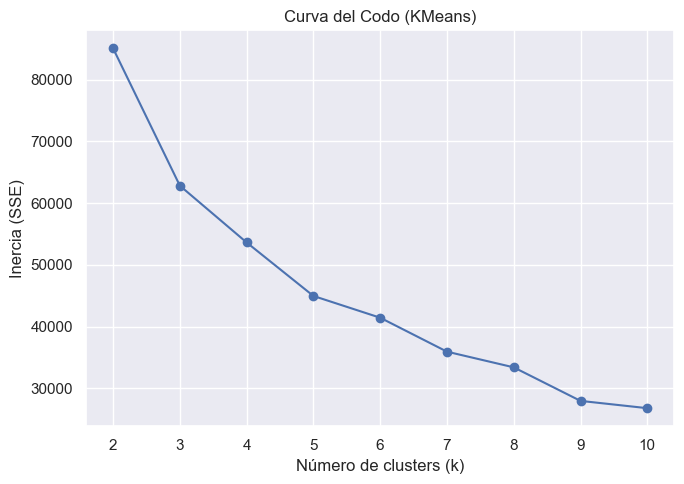

In [63]:
# === ELBOW + SILHOUETTE PARA KMEANS ===
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

num_cols = df_std.select_dtypes(include=[np.number]).columns.tolist()
X = df_std[num_cols].dropna().values  # matriz (n_samples, n_features)

X_elbow = X

# Rango de k a evaluar
k_range = range(2, 11)  # 2..10

# inercia
inertias = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=0, n_init='auto')
    km.fit(X_elbow)
    inertias.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(list(k_range), inertias, marker='o')
plt.xticks(list(k_range))
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (SSE)')
plt.title('Curva del Codo (KMeans)')
plt.tight_layout()
plt.show()

In [64]:
def maybe_sample(X, max_samples=6000, random_state=42):
    if X.shape[0] > max_samples:
        rng = np.random.default_rng(random_state)
        idx = rng.choice(X.shape[0], size=max_samples, replace=False)
        return X[idx]
    return X

Mejor k por silueta media ≈ 7 (score=0.383)


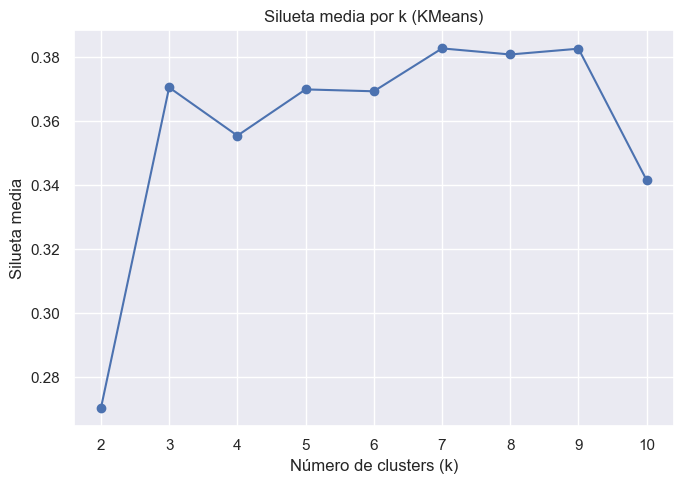

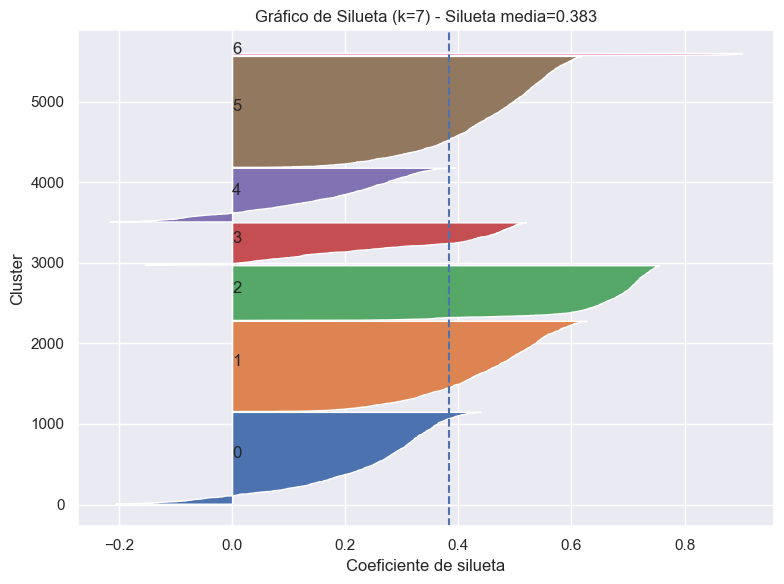

In [65]:


# Elegir K por silueta
sil_avgs = []
labels_por_k = {}
model_por_k = {}
X_sil = maybe_sample(X)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=0, n_init='auto')
    labels = km.fit_predict(X_sil)
    sil_avg = silhouette_score(X_sil, labels)
    sil_avgs.append(sil_avg)
    labels_por_k[k] = labels
    model_por_k[k] = km

best_k = list(k_range)[int(np.argmax(sil_avgs))]
print(f"Mejor k por silueta media ≈ {best_k} (score={sil_avgs[np.argmax(sil_avgs)]:.3f})")

# Curva de silueta media vs k 
plt.figure(figsize=(7,5))
plt.plot(list(k_range), sil_avgs, marker='o')
plt.xticks(list(k_range))
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silueta media')
plt.title('Silueta media por k (KMeans)')
plt.tight_layout()
plt.show()


# Grafico de silueta para el mejor
k_for_sil = best_k  
labels = labels_por_k[k_for_sil]
silhouette_vals = silhouette_samples(X_sil, labels)
silhouette_avg = silhouette_score(X_sil, labels)

fig, ax = plt.subplots(figsize=(8,6))
y_lower = 10
for i in range(k_for_sil):
    ith_vals = silhouette_vals[labels == i]
    ith_vals.sort()
    size_i = ith_vals.shape[0]
    y_upper = y_lower + size_i
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_vals)
    ax.text(0.0, y_lower + 0.5 * size_i, str(i))
    y_lower = y_upper + 10  # espacio entre clusters

ax.axvline(x=silhouette_avg, linestyle='--')
ax.set_xlabel('Coeficiente de silueta')
ax.set_ylabel('Cluster')
ax.set_title(f'Gráfico de Silueta (k={k_for_sil}) - Silueta media={silhouette_avg:.3f}')
plt.tight_layout()
plt.show()

# Agglomerative clustering (Esteban Benavides)

Agglomerative clustering es un algoritmo de clustering jerarquico que comienza tratando cada punto como su propio cluster y en cada paso fusiona la dos clusters mas cercanos hassta llegar al numero de clusters deseados.

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler


num_cols = df_std.select_dtypes(include=[np.number]).columns.tolist()
X_full = df_std[num_cols].dropna().values


Para n_clusters = 2, Silhouette = 0.435
Para n_clusters = 3, Silhouette = 0.370
Para n_clusters = 4, Silhouette = 0.330
Para n_clusters = 5, Silhouette = 0.352
Para n_clusters = 6, Silhouette = 0.365
Para n_clusters = 7, Silhouette = 0.364
Para n_clusters = 8, Silhouette = 0.374
Para n_clusters = 9, Silhouette = 0.375
Para n_clusters = 10, Silhouette = 0.378


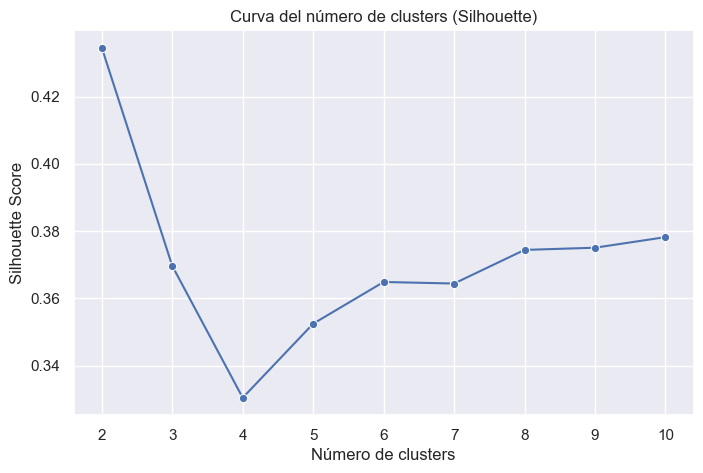

In [70]:
range_n_clusters = list(range(2, 11))  
silhouette_avgs = []

for n_clusters in range_n_clusters:
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
    labels = clustering.fit_predict(X_full)

    silhouette_avg = silhouette_score(X_full, labels)
    silhouette_avgs.append(silhouette_avg)
    print(f"Para n_clusters = {n_clusters}, Silhouette = {silhouette_avg:.3f}")

# Graficar curva del "codo" con silueta
plt.figure(figsize=(8,5))
sns.lineplot(x=range_n_clusters, y=silhouette_avgs, marker="o")
plt.title("Curva del número de clusters (Silhouette)")
plt.xlabel("Número de clusters")
plt.ylabel("Silhouette Score")
plt.show()

Como se puede ver, con el silhoutte score se define que tan bien asignado esta un punto a su cluster, en donde se busca obetener el valor mas alto posible del score, en este caso basandonos en esta metrica el numero optimo de clusters seria 2

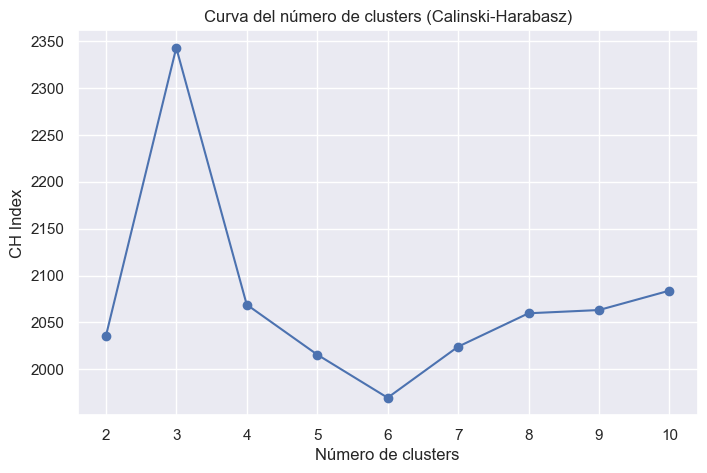

In [69]:
from sklearn.metrics import calinski_harabasz_score


range_n_clusters = range(2, 11)
ch_scores = []

for n_clusters in range_n_clusters:
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
    labels = clustering.fit_predict(X_full)
    ch_scores.append(calinski_harabasz_score(X_full, labels))

plt.figure(figsize=(8,5))
plt.plot(range_n_clusters, ch_scores, marker="o")
plt.title("Curva del número de clusters (Calinski-Harabasz)")
plt.xlabel("Número de clusters")
plt.ylabel("CH Index")
plt.show()

En este caso usando la merica de CH, la cual mide la drelacion de dispercion enter clusters y dentro de clusters, el valor optimo de clusters seria 3 (buscamos un valor alto de la metrica)

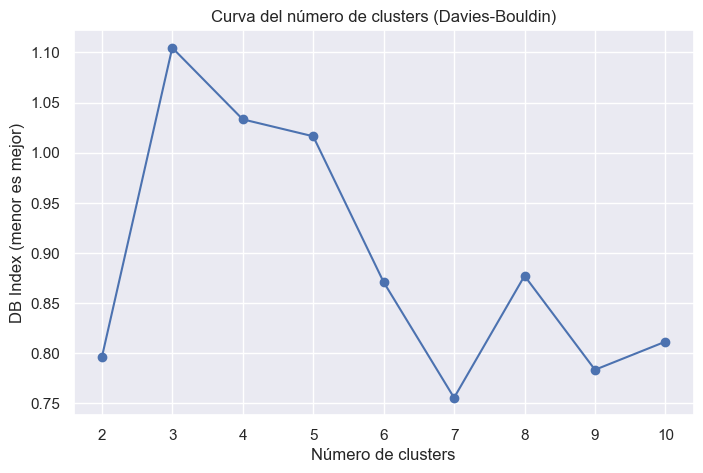

In [71]:
from sklearn.metrics import davies_bouldin_score

db_scores = []

for n_clusters in range(2, 11):
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
    labels = clustering.fit_predict(X_full)
    db_scores.append(davies_bouldin_score(X_full, labels))

plt.figure(figsize=(8,5))
plt.plot(range_n_clusters, db_scores, marker="o")
plt.title("Curva del número de clusters (Davies-Bouldin)")
plt.xlabel("Número de clusters")
plt.ylabel("DB Index (menor es mejor)")
plt.show()

Por ultimo la metrica de DB evalua la similitud entre cada cluster y su cluster mas parecido, aqui se busca minimizar el valor de la metrica. Basado en la grafica el numero optimo de clusters seria 7, sin embargo, el valor de 2 clusters no es malo. Por lo tanto se tomo la decision de usar 2 clusters para el algoritmo de clusters final

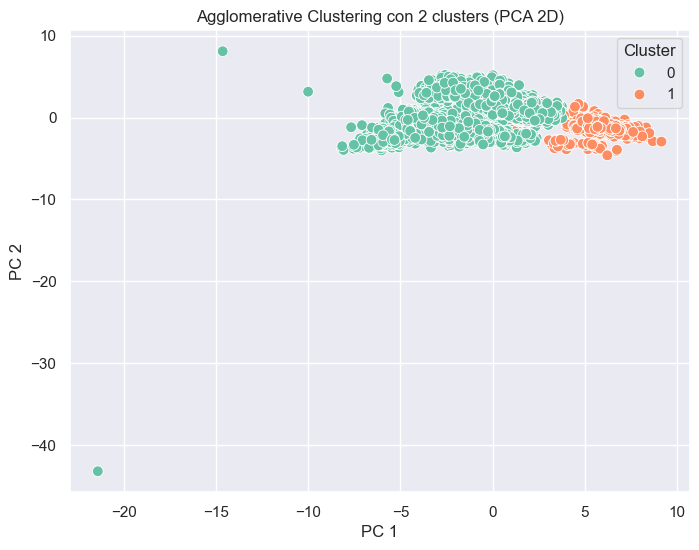

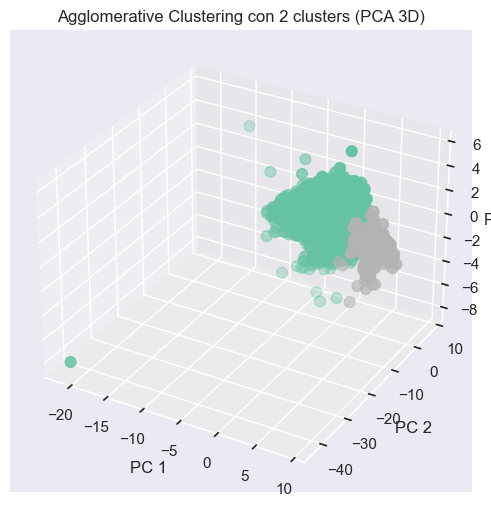

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA


n_clusters = 2  


clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
labels = clustering.fit_predict(X_full)


df_std["Cluster"] = labels  


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_full)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="Set2", s=60)
plt.title(f"Agglomerative Clustering con {n_clusters} clusters (PCA 2D)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(title="Cluster")
plt.show()


pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_full)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2], 
                     c=labels, cmap="Set2", s=60)

ax.set_title(f"Agglomerative Clustering con {n_clusters} clusters (PCA 3D)")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
plt.show()


Silhouette Score promedio: 0.435


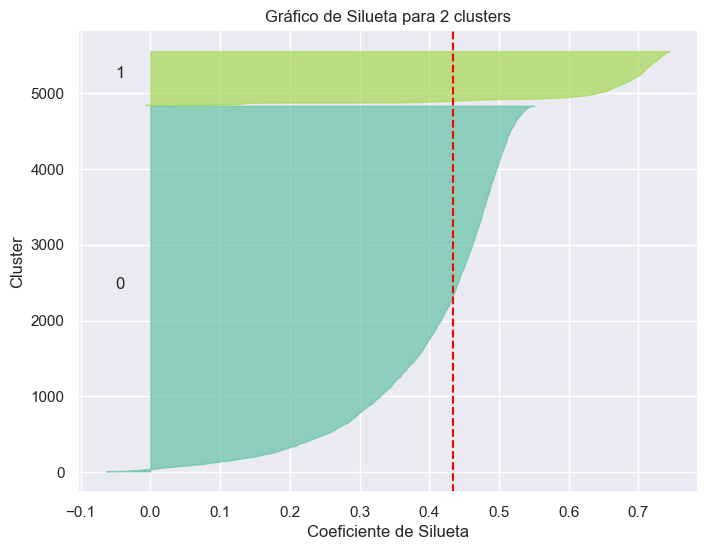

In [79]:
silhouette_avg = silhouette_score(X_full, labels)
sample_silhouette_values = silhouette_samples(X_full, labels)

print(f"Silhouette Score promedio: {silhouette_avg:.3f}")


fig, ax = plt.subplots(figsize=(8,6))

y_lower = 10
for i in range(n_clusters):
    cluster_silhouette_vals = sample_silhouette_values[labels == i]
    cluster_silhouette_vals.sort()

    size_cluster = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster

    color = plt.cm.Set2(i / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, cluster_silhouette_vals,
                     facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
    y_lower = y_upper + 10


ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_title(f"Gráfico de Silueta para {n_clusters} clusters")
ax.set_xlabel("Coeficiente de Silueta")
ax.set_ylabel("Cluster")
plt.show()

Como se puede observar en los resultado, basandonos en el grafico de silueta para 2 clusters, los clusters tienen valores de silueta por encima de 0.4 en una buena parte. Esto significa que los clusters estan bien definidos y el modelo logra agrupar los datos dentro de estos dos clusters con una separacion entre clusters decente

# también borrar

In [66]:
# # === GMM (Gaussian Mixture) vs KMeans: selección por BIC y Silueta ===
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.mixture import GaussianMixture
# from sklearn.metrics import silhouette_score, silhouette_samples
# from sklearn.decomposition import PCA
# from matplotlib.patches import Ellipse

# # -----------------------------------------------------------
# # 1) Datos: usa tu df_std (ya estandarizado). Tomamos numéricas.
# # -----------------------------------------------------------
# num_cols = df_std.select_dtypes(include=[np.number]).columns.tolist()
# X = df_std[num_cols].dropna().values

# # (Opcional) Muestras para acelerar silueta si hay MUCHAS filas
# def maybe_sample(X, max_samples=6000, random_state=42):
#     if X.shape[0] > max_samples:
#         rng = np.random.default_rng(random_state)
#         idx = rng.choice(X.shape[0], size=max_samples, replace=False)
#         return X[idx]
#     return X

# X_sil = maybe_sample(X)

# # -----------------------------------------------------------
# # 2) Selección de hiperparámetros: k y tipo de covarianza
# # -----------------------------------------------------------
# k_range = range(2, 11)  # 2..10
# cov_types = ["full", "tied", "diag", "spherical"]

# results = []
# for cov in cov_types:
#     for k in k_range:
#         gmm = GaussianMixture(
#             n_components=k, covariance_type=cov, random_state=0, n_init=3
#         )
#         gmm.fit(X)
#         bic = gmm.bic(X)
#         # Silueta en una muestra (para velocidad). Requiere k>1, ya lo tenemos.
#         labels = gmm.predict(X_sil)
#         sil = silhouette_score(X_sil, labels)
#         results.append({"cov": cov, "k": k, "bic": bic, "sil": sil})

# res = pd.DataFrame(results)

# # Elegimos por BIC mínimo; si empata, mejor silueta
# best_row = res.sort_values(["bic", "sil"], ascending=[True, False]).iloc[0]
# best_cov = best_row["cov"]
# best_k   = int(best_row["k"])
# print(f"Mejor configuración: cov='{best_cov}', k={best_k} | BIC={best_row['bic']:.1f}, Sil={best_row['sil']:.3f}")

# # -----------------------------------------------------------
# # 3) Curvas de BIC por k (una línea por tipo de covarianza)
# # -----------------------------------------------------------
# plt.figure(figsize=(8,5))
# for cov in cov_types:
#     subset = res[res["cov"] == cov].sort_values("k")
#     plt.plot(subset["k"], subset["bic"], marker="o", label=cov)
# plt.xlabel("Número de componentes (k)")
# plt.ylabel("BIC (más bajo es mejor)")
# plt.title("GMM: BIC por k y tipo de covarianza")
# plt.legend()
# plt.tight_layout()
# plt.show()

# # -----------------------------------------------------------
# # 4) Silueta media por k para el tipo de covarianza ganador
# # -----------------------------------------------------------
# best_cov_df = res[res["cov"] == best_cov].sort_values("k")
# plt.figure(figsize=(8,5))
# plt.plot(best_cov_df["k"], best_cov_df["sil"], marker="o")
# plt.xlabel("Número de componentes (k)")
# plt.ylabel("Silueta media")
# plt.title(f"GMM ({best_cov}): Silueta media por k")
# plt.tight_layout()
# plt.show()

# # -----------------------------------------------------------
# # 5) Gráfico de silueta detallado para el mejor k
# # -----------------------------------------------------------
# best_gmm = GaussianMixture(
#     n_components=best_k, covariance_type=best_cov, random_state=0, n_init=5
# ).fit(X_sil)
# labels = best_gmm.predict(X_sil)
# sil_vals = silhouette_samples(X_sil, labels)
# sil_avg = silhouette_score(X_sil, labels)

# fig, ax = plt.subplots(figsize=(8,6))
# y_lower = 10
# for i in range(best_k):
#     ith = sil_vals[labels == i]
#     ith.sort()
#     size_i = ith.shape[0]
#     y_upper = y_lower + size_i
#     ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith)
#     ax.text(0.0, y_lower + 0.5*size_i, str(i))
#     y_lower = y_upper + 10

# ax.axvline(x=sil_avg, linestyle="--")
# ax.set_xlabel("Coeficiente de silueta")
# ax.set_ylabel("Cluster")
# ax.set_title(f"Silhouette — GMM (k={best_k}, cov={best_cov})  Silueta media={sil_avg:.3f}")
# plt.tight_layout()
# plt.show()

# # -----------------------------------------------------------
# # 6) Proyección 2D con elipses de covarianza para interpretar
# # -----------------------------------------------------------
# pca = PCA(n_components=2, random_state=0).fit(X)
# X2 = pca.transform(X)
# best_gmm_full = GaussianMixture(
#     n_components=best_k, covariance_type=best_cov, random_state=0, n_init=5
# ).fit(X)
# lbl_full = best_gmm_full.predict(X)
# means2 = pca.transform(best_gmm_full.means_)

# def draw_ellipse(position, covariance, ax):
#     # Covarianza transformada a 2D
#     if covariance.shape == (X.shape[1], X.shape[1]):
#         cov2 = pca.components_ @ covariance @ pca.components_.T
#         cov2 = cov2[:2,:2]
#     else:
#         cov2 = covariance
#     vals, vecs = np.linalg.eigh(cov2)
#     order = vals.argsort()[::-1]
#     vals, vecs = vals[order], vecs[:, order]
#     theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
#     # Dibujamos varias sigmas para dar sensación de densidad
#     for nsig in (1, 2):
#         width, height = 2 * nsig * np.sqrt(vals)
#         ell = Ellipse(xy=position, width=width, height=height, angle=theta, alpha=0.15)
#         ax.add_patch(ell)

# plt.figure(figsize=(8,6))
# plt.scatter(X2[:,0], X2[:,1], c=lbl_full, alpha=0.7)
# for k in range(best_k):
#     draw_ellipse(means2[k], best_gmm_full.covariances_[k] if best_cov != "tied" else best_gmm_full.covariances_, plt.gca())
#     plt.scatter(means2[k,0], means2[k,1], marker="x", s=120)
# plt.xlabel("PCA 1")
# plt.ylabel("PCA 2")
# plt.title(f"GMM — proyección 2D con elipses (k={best_k}, cov={best_cov})")
# plt.tight_layout()
# plt.show()

# # -----------------------------------------------------------
# # 7) Probabilidades de pertenencia (soft clustering) — opcional
# # -----------------------------------------------------------
# probas = best_gmm_full.predict_proba(X)  # matriz (n_samples, k)
# print("Ejemplo de probabilidades de pertenencia (primeras 5 filas):\n",
#       np.round(probas[:5], 3))
